In [8]:
import pickle
from pathlib import Path

import pandas as pd

# ------------------------------------------------------------------
# 1. chemin du pickle (adapter si besoin)
PKL = Path("C:/Users/Dell/projects/regional_flex/results/full_year.pkl")

# 2. chargement
with PKL.open("rb") as f:
    res = pickle.load(f)

# ------------------------------------------------------------------
# 3. reconstruction d’un DataFrame « long » ⇢ « large »
#    (index = pas de temps, colonnes = variables)
first_var = next(iter(res["variables"].values()))
idx = pd.date_range("2022-01-01", periods=len(first_var), freq="30min")

# Existing code...
table = {}
for var_name, series_dict in res["variables"].items():
    s = pd.Series(series_dict).reindex(range(len(idx)), fill_value=0.0)
    table[var_name] = s.values

# NEW: Add dual variables (nodal prices) if present
if "dual_variables" in res:
    for region, price_series in res["dual_variables"].items():
        # price_series is likely a pandas Series or dict
        s = pd.Series(price_series).reindex(range(len(idx)), fill_value=0.0)
        table[f"nodal_price_{region}"] = s.values

df = pd.DataFrame(table, index=idx)
df.to_csv("C:/Users/Dell/projects/regional_flex/full_year.csv")
print(df.shape)

(17473, 76)


In [2]:
df.head()

,dispatch_hydro_Auvergne_Rhone_Alpes,dispatch_nuclear_Auvergne_Rhone_Alpes,dispatch_thermal_gas_Auvergne_Rhone_Alpes,dispatch_thermal_coal_Auvergne_Rhone_Alpes,dispatch_biofuel_Auvergne_Rhone_Alpes,storage_soc_STEP_Auvergne_Rhone_Alpes,storage_charge_STEP_Auvergne_Rhone_Alpes,storage_discharge_STEP_Auvergne_Rhone_Alpes,storage_soc_batteries_Auvergne_Rhone_Alpes,storage_charge_batteries_Auvergne_Rhone_Alpes,...,flow_out_Auvergne_Rhone_Alpes_Provence_Alpes_Cote_dAzur,flow_out_Nouvelle_Aquitaine_Auvergne_Rhone_Alpes,flow_out_Nouvelle_Aquitaine_Occitanie,flow_out_Nouvelle_Aquitaine_Provence_Alpes_Cote_dAzur,flow_out_Occitanie_Auvergne_Rhone_Alpes,flow_out_Occitanie_Nouvelle_Aquitaine,flow_out_Occitanie_Provence_Alpes_Cote_dAzur,flow_out_Provence_Alpes_Cote_dAzur_Auvergne_Rhone_Alpes,flow_out_Provence_Alpes_Cote_dAzur_Nouvelle_Aquitaine,flow_out_Provence_Alpes_Cote_dAzur_Occitanie
2022-01-01 00:00:00,6190.3131,2119.465,44.8,7.2,2.280,0.0,0.0,0.0,0.0,0.0,...,599.18310,0.0,0.0,671.43158,0.0,0.0,0.0000,0.0,0.0,0.0
2022-01-01 00:30:00,6087.6861,2112.650,39.2,6.3,1.995,0.0,0.0,0.0,0.0,0.0,...,501.71407,0.0,0.0,653.30658,0.0,0.0,0.0000,0.0,0.0,0.0
2022-01-01 01:00:00,5985.0591,2105.835,33.6,5.4,1.710,0.0,0.0,0.0,0.0,0.0,...,631.60410,0.0,0.0,770.18158,0.0,0.0,121.7625,0.0,0.0,0.0
2022-01-01 01:30:00,5882.4321,2099.020,28.0,4.5,1.425,0.0,0.0,0.0,0.0,0.0,...,504.37710,0.0,0.0,581.05658,0.0,0.0,85.1750,0.0,0.0,0.0
2022-01-01 02:00:00,5779.8051,2092.205,22.4,3.6,1.140,0.0,0.0,0.0,0.0,0.0,...,388.15010,0.0,0.0,715.93158,0.0,0.0,33.5875,0.0,0.0,0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Rechargement du CSV avec parse des dates
df = pd.read_csv("full_year.csv", index_col=0, parse_dates=True)

# Harmonisation des noms de colonnes si nécessaire (ici, tout semble propre déjà)
df.columns = df.columns.str.strip()


battery: 0 colonnes trouvées.
step: 0 colonnes trouvées.
dr: 0 colonnes trouvées.
network: 0 colonnes trouvées.


C:\Users\Dell\AppData\Local\Temp\ipykernel_23248\802225327.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prices = pd.read_csv("results/nodal_prices_full_year.csv", index_col=0, parse_dates=True)


TypeError: no numeric data to plot

,timestep,Auvergne_Rhone_Alpes,Nouvelle_Aquitaine,Occitanie,Provence_Alpes_Cote_dAzur
0,0,87.2,95.0,119.3617,120.0
1,1,87.2,95.0,119.3617,120.0
2,2,87.2,95.0,89.3000,120.0
3,3,87.2,95.0,89.3000,120.0
4,4,87.2,95.0,89.3000,120.0


Nodal price columns: ['timestep', 'Auvergne_Rhone_Alpes', 'Nouvelle_Aquitaine', 'Occitanie', 'Provence_Alpes_Cote_dAzur']


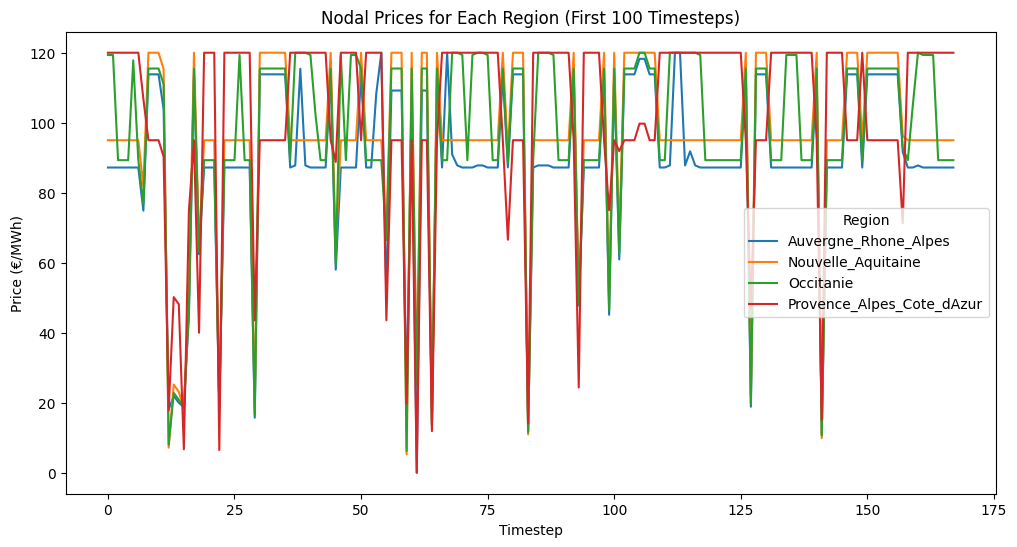

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load nodal prices CSV (update the path if needed)
nodal_prices = pd.read_csv("C:/Users/Dell/projects/regional_flex/results/nodal_prices_full_year.csv")

# Display the first few rows
display(nodal_prices.head())

# Show column names to confirm variable names
print("Nodal price columns:", nodal_prices.columns.tolist())

# Optionally plot nodal prices for each region for the first 100 timesteps
nodal_prices.set_index('timestep')[['Auvergne_Rhone_Alpes', 'Nouvelle_Aquitaine', 'Occitanie', 'Provence_Alpes_Cote_dAzur']].iloc[:168].plot(figsize=(12,6))
plt.title("Nodal Prices for Each Region (First 100 Timesteps)")
plt.ylabel("Price (€/MWh)")
plt.xlabel("Timestep")
plt.legend(title="Region")
plt.show()

In [11]:
import numpy as np

exchange_matrix = pd.DataFrame(0, index=regions, columns=regions)

for i in regions:
    for j in regions:
        if i == j:
            continue
        col = f'flow_out_{i}_{j}'
        if col in df.columns:
            exchange_matrix.loc[i, j] = df[col].sum()

# Matrice nette : exportations - importations
net_exchange = exchange_matrix.subtract(exchange_matrix.T)
net_exchange.style.background_gradient(cmap='RdBu', axis=None)


C:\Users\Dell\AppData\Local\Temp\ipykernel_9864\2435686659.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73191.81720066999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  exchange_matrix.loc[i, j] = df[col].sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_9864\2435686659.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '583067.4546201769' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  exchange_matrix.loc[i, j] = df[col].sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_9864\2435686659.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10779511.79928774' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  exchang

,Auvergne_Rhone_Alpes,Nouvelle_Aquitaine,Occitanie,Provence_Alpes_Cote_dAzur
Auvergne_Rhone_Alpes,0.000000,-20391.933453,572519.461511,10778877.296799
Nouvelle_Aquitaine,20391.933453,0.000000,-43141.061281,2269906.172556
Occitanie,-572519.461511,43141.061281,0.000000,2636003.122874
Provence_Alpes_Cote_dAzur,-10778877.296799,-2269906.172556,-2636003.122874,0.000000


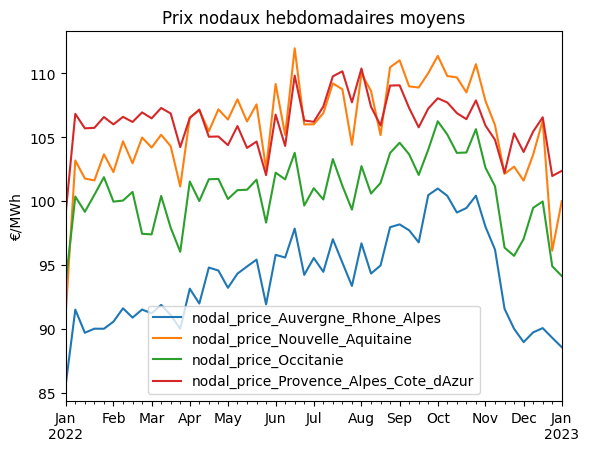

In [12]:
nodal_cols = [col for col in df.columns if col.startswith('nodal_price')]
df[nodal_cols].resample("W").mean().plot(title='Prix nodaux hebdomadaires moyens')
plt.ylabel("€/MWh")
plt.show()


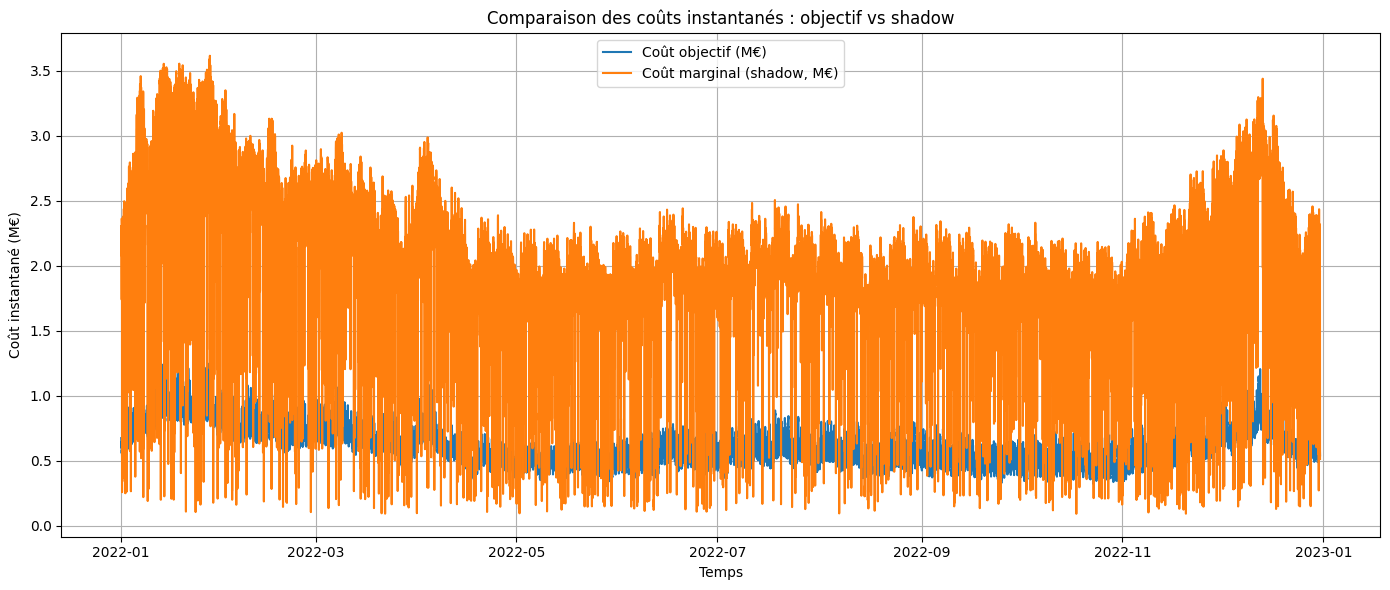

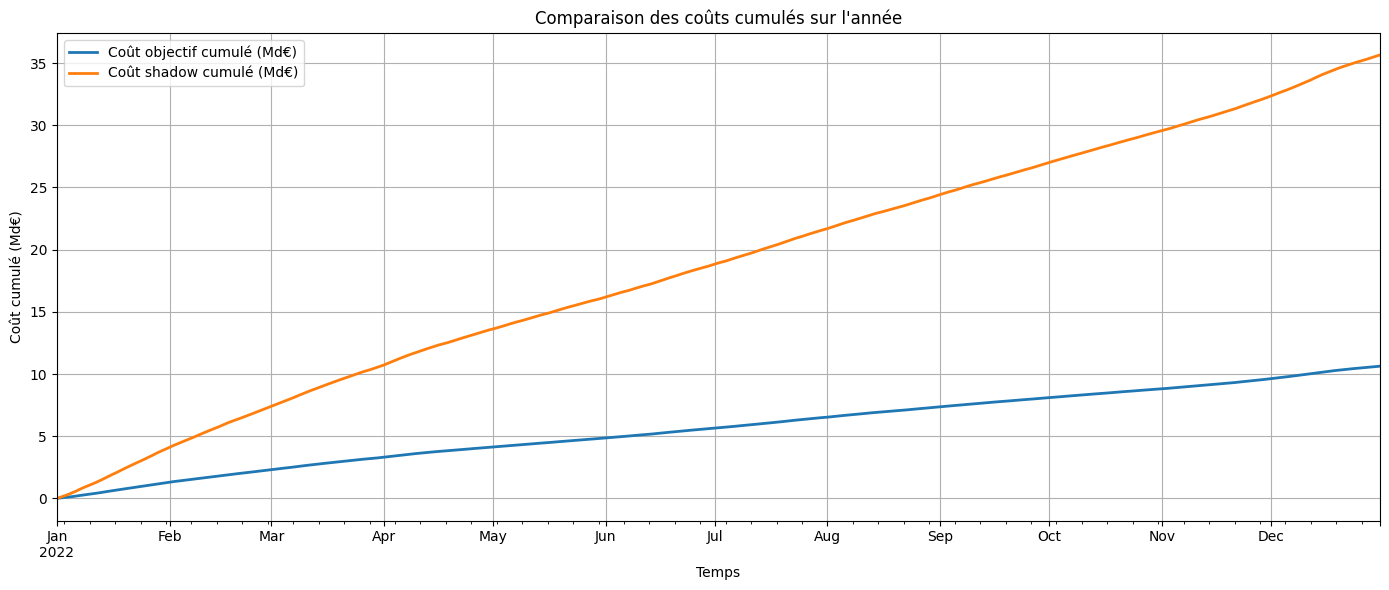

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

# Charger les données
df = pd.read_csv("full_year.csv", parse_dates=["Unnamed: 0"])
df.rename(columns={"Unnamed: 0": "timestamp"}, inplace=True)
df.set_index("timestamp", inplace=True)

# Charger les coûts depuis le fichier YAML
with open("config/config_master.yaml", "r") as f:
    config = yaml.safe_load(f)

regions = config["regions"]
regional_costs = config["regional_costs"]
costs = config["costs"]

# Technologies et coûts
dispatch_techs = ["hydro", "nuclear", "thermal_gas", "thermal_coal", "biofuel"]
storage_techs = ["STEP", "batteries"]

# 1. Coût objectif instantané
objective_costs = []

for t in df.index:
    total = 0
    for region in regions:
        for tech in dispatch_techs:
            col = f"dispatch_{tech}_{region}"
            if col in df.columns:
                total += df.at[t, col] * regional_costs[region][tech]
        for st in storage_techs:
            for action in ["charge", "discharge"]:
                col = f"storage_{action}_{st}_{region}"
                if col in df.columns:
                    cost_key = f"storage_{action}"
                    total += df.at[t, col] * costs[cost_key]
        dr_col = f"demand_response_{region}"
        if dr_col in df.columns:
            total += abs(df.at[t, dr_col]) * costs["demand_response"]
        for dest in regions:
            if region != dest:
                flow_col = f"flow_out_{region}_{dest}"
                if flow_col in df.columns:
                    total += df.at[t, flow_col] * costs["exchange"]
    objective_costs.append(total)

df["objective_cost"] = objective_costs

# 2. Coût marginal théorique basé sur les prix nodaux × demande estimée
shadow_costs = []
for t in df.index:
    shadow_total = 0
    for region in regions:
        nodal_price = df.at[t, f"nodal_price_{region}"]
        dispatch_cols = [f"dispatch_{tech}_{region}" for tech in dispatch_techs if f"dispatch_{tech}_{region}" in df.columns]
        discharge_cols = [f"storage_discharge_{st}_{region}" for st in storage_techs if f"storage_discharge_{st}_{region}" in df.columns]
        charge_cols = [f"storage_charge_{st}_{region}" for st in storage_techs if f"storage_charge_{st}_{region}" in df.columns]
        demand = df.loc[t, dispatch_cols].sum() + df.loc[t, discharge_cols].sum() - df.loc[t, charge_cols].sum()
        shadow_total += demand * nodal_price
    shadow_costs.append(shadow_total)

df["shadow_cost"] = shadow_costs

# 3. Visualisation comparative instantanée
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["objective_cost"] / 1e6, label="Coût objectif (M€)", linewidth=1.5)
plt.plot(df.index, df["shadow_cost"] / 1e6, label="Coût marginal (shadow, M€)", linewidth=1.5)
plt.xlabel("Temps")
plt.ylabel("Coût instantané (M€)")
plt.title("Comparaison des coûts instantanés : objectif vs shadow")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Visualisation cumulative
cumulative_df = df[["objective_cost", "shadow_cost"]].cumsum() / 1e9
cumulative_df.columns = ["Coût objectif cumulé (Md€)", "Coût shadow cumulé (Md€)"]
cumulative_df.plot(figsize=(14, 6), linewidth=2)
plt.title("Comparaison des coûts cumulés sur l'année")
plt.xlabel("Temps")
plt.ylabel("Coût cumulé (Md€)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
print(df["objective_cost"].sum())
print(df["shadow_cost"].sum())
print(df["objective_cost"].sum() - df["shadow_cost"].sum())
print(((df["objective_cost"].sum() - df["shadow_cost"].sum()) / df["objective_cost"].sum()) * 100)


10629775649.144968
35655164749.12772
-25025389099.982758
-235.42725572007473


,Décomposition du surplus
Surplus total (M€),25025.4
Congestion réseau (M€),14.4
DR saturée (M€),24135.3
Stockage saturé (M€),0.0
Reste (M€),875.7


T‑test : t = 393.55,  p‑value = 0.00e+00
Wilcoxon : W = 284922, p‑value = 0.00e+00


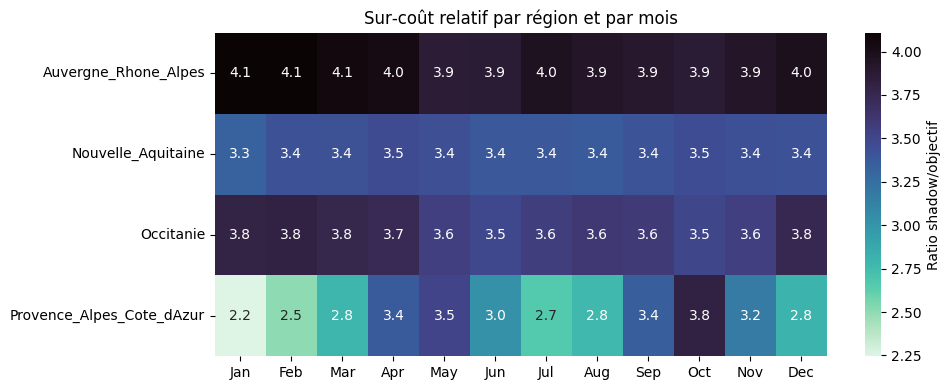

In [26]:
# %% [markdown]
# # 📊 Cellule 1 – Décomposition du surplus par contrainte active  
# ---
# Cette cellule calcule, pour chaque pas de temps :
# 1. le surplus Δ = shadow – objectif (€) ;  
# 2. indique si **(a)** une liaison inter‑régionale est saturée, **(b)** la DR atteint sa limite,
#    **(c)** la puissance de (dé)charge d’un stockage est saturée.  
# Puis elle ventile le surplus annuel entre ces trois catégories et « reste ».
#
# **Pré‑requis :**  
# * `df` : DataFrame horaire contenant les colonnes techno + `objective_cost`, `shadow_cost`.  
# * `config` : dictionnaire YAML (chargé comme précédemment).  
#
import pandas as pd
import yaml

# --- (re)charger YAML si besoin ------------------------------------------------
with open('config/config_master.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

regions   = cfg['regions']
transport = cfg['constraints']['regional_transport_capacities']
dr_params = cfg['demand_response']
storage_caps = cfg['constraints']['regional_storage']
storage_techs = ['STEP', 'batteries']

# --- récupérer Δ --------------------------------------------------------------
df['surplus'] = df['shadow_cost'] - df['objective_cost']

# --- colonnes booléennes contraintes actives ----------------------------------
df['cong_network'] = False
for i in regions:
    for j in regions:
        if i == j: 
            continue
        col = f'flow_out_{i}_{j}'
        if col not in df.columns: 
            continue
        cap_ij = transport.get(i, {}).get(j, transport.get(j, {}).get(i, 0))
        if cap_ij > 0:
            df['cong_network'] |= df[col] >= 0.999 * cap_ij  # congestion

# DR saturée ?
df['dr_bound'] = False
for r in regions:
    p = dr_params[r]
    max_total = p['max_total']
    max_shift_pct = p['max_shift'] / 100
    par_rate = p['participation_rate'] / 100
    col = f'demand_response_{r}'
    if col not in df.columns:
        continue
    # borne instantanée = demande_est * %shift * par_rate
    # On approxime demande_est par (dispatch+discharge-charge) comme précédemment
    disp = df[[c for c in df.columns if c.startswith('dispatch_') and c.endswith(f'_{r}')]].sum(axis=1)
    dis  = df[[c for c in df.columns if c.startswith('storage_discharge_') and c.endswith(f'_{r}')]].sum(axis=1)
    ch   = df[[c for c in df.columns if c.startswith('storage_charge_') and c.endswith(f'_{r}')]].sum(axis=1)
    demand_est = disp + dis - ch
    inst_cap = demand_est * max_shift_pct * par_rate
    df['dr_bound'] |= abs(df[col]) >= 0.999 * inst_cap

# Stockage saturé ?
df['stor_sat'] = False
for r in regions:
    caps = storage_caps[r]
    for st in storage_techs:
        cap_p = caps.get(f'{st}_puissance_MW', 0)
        if cap_p == 0:
            continue
        for act in ('charge', 'discharge'):
            col = f'storage_{act}_{st}_{r}'
            if col in df.columns:
                df['stor_sat'] |= df[col] >= 0.999 * cap_p

# --- Ventilation du surplus ---------------------------------------------------
summary = {
    'Surplus total (M€)': df['surplus'].sum()/1e6,
    'Congestion réseau (M€)': df.loc[df['cong_network'], 'surplus'].sum()/1e6,
    'DR saturée (M€)':       df.loc[df['dr_bound'],      'surplus'].sum()/1e6,
    'Stockage saturé (M€)':  df.loc[df['stor_sat'],      'surplus'].sum()/1e6,
}
summary['Reste (M€)'] = summary['Surplus total (M€)'] - summary['Congestion réseau (M€)'] \
                        - summary['DR saturée (M€)'] - summary['Stockage saturé (M€)']

display(pd.Series(summary).round(1).to_frame('Décomposition du surplus'))

# %% [markdown]
# # 📈 Cellule 2 – Test statistique « shadow > objectif »
# ---
# * On réalise un **test t de Student apparié** (et, à titre de robustesse,
#   un test de Wilcoxon) entre les deux séries horaires.  
# * On imprime la p‑value : si p < 0,05, l’hypothèse « shadow ≤ objectif » est rejetée.

import scipy.stats as st
diff = df['shadow_cost'] - df['objective_cost']

t_stat, p_val = st.ttest_rel(df['shadow_cost'], df['objective_cost'])
w_stat, p_w   = st.wilcoxon(diff)

print(f"T‑test : t = {t_stat:.2f},  p‑value = {p_val:.2e}")
print(f"Wilcoxon : W = {w_stat:.0f}, p‑value = {p_w:.2e}")

# %% [markdown]
# # 🌐 Cellule 3 – Heat‑map région × mois du ratio shadow/objectif
# ---
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Résolution mensuelle
df['month'] = df.index.month
heat = pd.DataFrame(index=regions, columns=range(1,13), dtype=float)

for r in regions:
    disp = df[[c for c in df.columns if c.startswith('dispatch_') and c.endswith(f'_{r}')]].sum(axis=1)
    dis  = df[[c for c in df.columns if c.startswith('storage_discharge_') and c.endswith(f'_{r}')]].sum(axis=1)
    ch   = df[[c for c in df.columns if c.startswith('storage_charge_') and c.endswith(f'_{r}')]].sum(axis=1)
    demand = disp + dis - ch
    price_col = f'nodal_price_{r}'
    nodal_cost = (demand * df[price_col]).groupby(df['month']).sum()
    # coût objectif régional
    obj_reg = []
    for tech in dispatch_techs:
        col = f'dispatch_{tech}_{r}'
        if col in df.columns:
            obj_reg.append(df[col] * regional_costs[r][tech])
    for st in storage_techs:
        for act in ['charge','discharge']:
            col = f'storage_{act}_{st}_{r}'
            if col in df.columns:
                obj_reg.append(df[col] * costs[f'storage_{act}'])
    dr = df[f'demand_response_{r}'] * costs['demand_response']
    obj_reg.append(abs(dr))
    obj_reg = sum(obj_reg)
    obj_month = obj_reg.groupby(df['month']).sum()
    # ratio
    ratio = (nodal_cost / obj_month).clip(upper=5)   # plafonne pour lisibilité
    heat.loc[r, ratio.index] = ratio.values

plt.figure(figsize=(10,4))
sns.heatmap(heat.astype(float), annot=True, fmt=".1f", cmap="mako_r",
            cbar_kws={'label':'Ratio shadow/objectif'})
plt.yticks(rotation=0)
plt.xticks(ticks=np.arange(12)+0.5, labels=[calendar.month_abbr[m] for m in range(1,13)])
plt.title("Sur‑coût relatif par région et par mois")
plt.tight_layout()
plt.show()
